In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

nsteps = 48
files = [
    f'../data/export/test/zerobond_results_T/zerobond_1_normalize_True_test_results_sigma_0.01_dim_1_{t}_5000_{t * nsteps}_epochs_1500.csv'
    for t in [1, 2, 4, 6, 7, 8]
]
Ts = [
    1, 2, 4, 6, 7, 8
]
test_df = pd.DataFrame()
for i, file in enumerate(files):
    test_df_tmp = pd.read_csv(
        file
    )
    test_df_tmp["T"] = Ts[i]
    # Concat
    test_df = pd.concat(
        [
            test_df,
            test_df_tmp
        ]
    )
# Relative error
test_df['pae'] = np.abs(test_df['V_est'] - test_df['V'])/test_df['V']
# Groupby
test_df_grouped = test_df.groupby(
    [
        "T",
        "dt"
    ]
).agg(
    mape = (
        "pae",
        "mean"
    ),
    mape_std = (
        "pae",
        "std"
    )
).reset_index()
test_df_grouped["mape+2*std"] = test_df_grouped.mape + 2 * test_df_grouped.mape_std

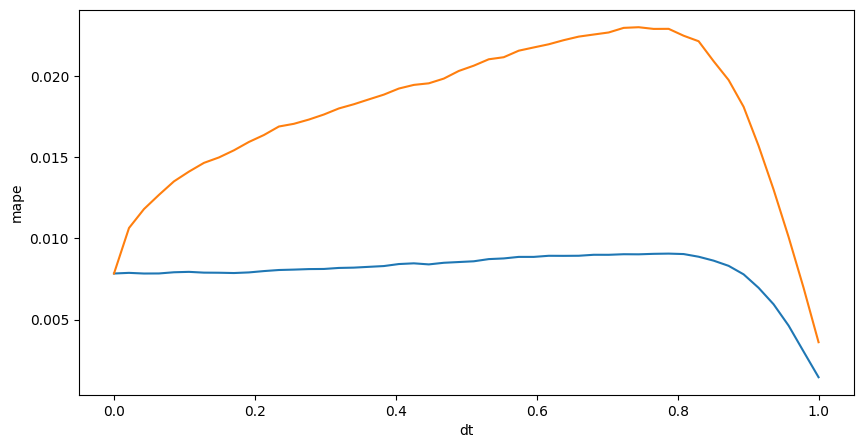

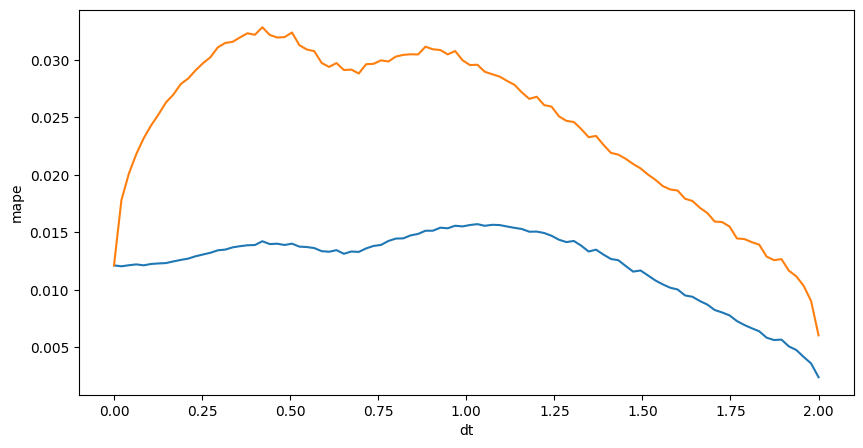

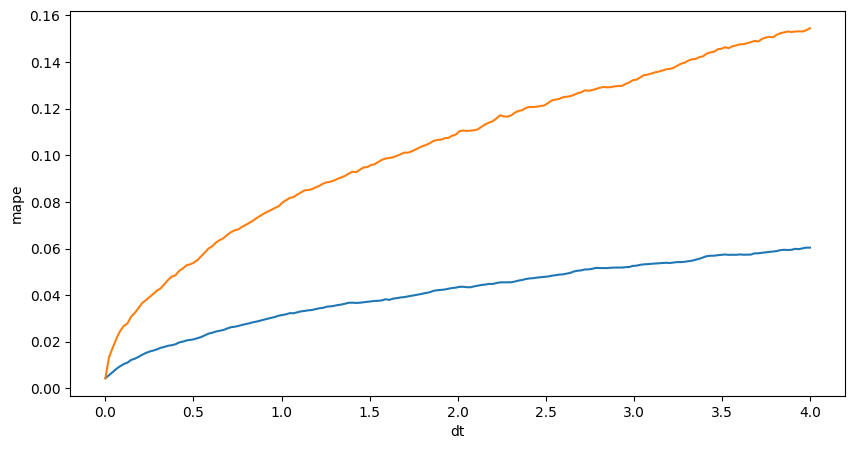

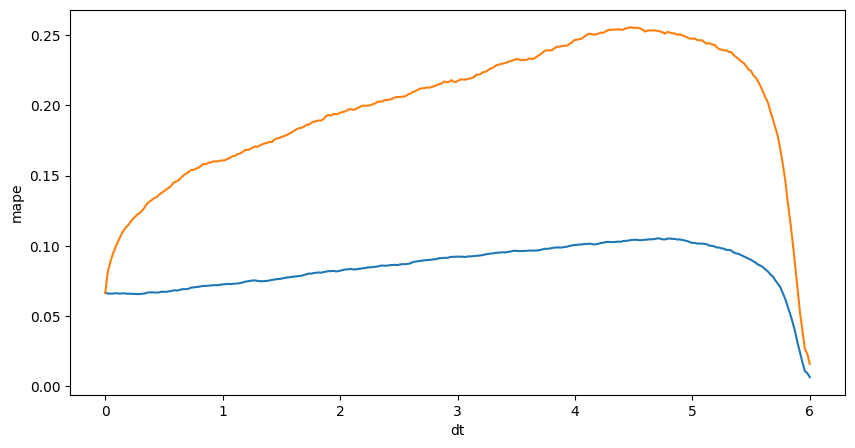

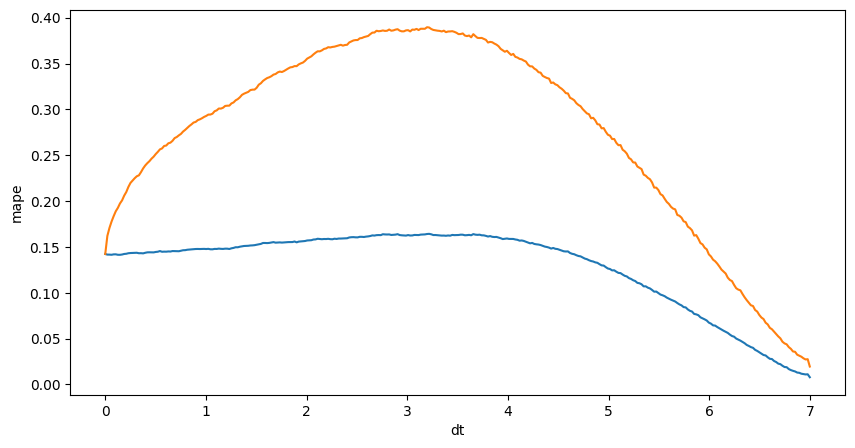

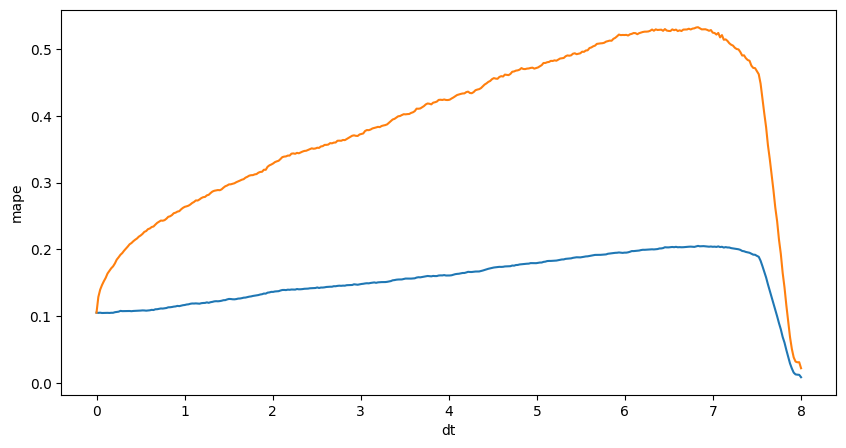

In [12]:
for t in Ts:
    df_tmp = test_df_grouped.loc[
        test_df_grouped["T"] == t
    ]
    plt.figure(
        figsize = (
            10,
            5
        )
    )
    sns.lineplot(
        x = "dt",
        y = "mape",
        data = df_tmp
    )
    sns.lineplot(
        x = "dt",
        y = "mape+2*std",
        data = df_tmp
    )
    plt.show()